In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import plotly
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)

# S&P 500 1970 - 2020, expected returns by years elapsed

In [17]:
# Read file
df_raw = pd.read_csv("data/SP500_1970-2020.csv", index_col='Date', parse_dates=True, thousands=",")
df_proc = df_raw.copy()

# Change to datetime
df_proc.index = [datetime.strptime(n, '%b %y') for n in df_proc.index]
df_proc["Date"] = df_proc.index

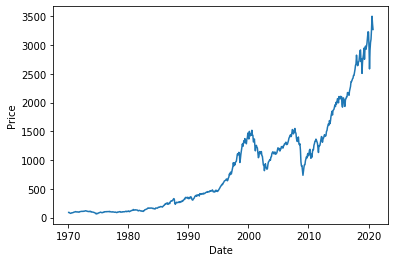

In [18]:
sns.lineplot(df_proc["Date"], df_proc["Price"])

In [21]:
data.loc[str(year)]["Open"].min()

330.2

In [29]:
### data = SP500
df_out = pd.DataFrame(data = np.nan, columns = np.arange(1970, 2021, 1).astype(str),
                      index = np.arange(1, 21, 1).astype(str))

for time_years in np.arange(1, 31):
    #time_years = 4
    year = 1970
    data = df_proc

    df = pd.DataFrame({"Change":np.nan}, index = np.arange(1970, 2021, 1).astype(str))
    
    while year + time_years <= 2020:
        #start = data.loc[str(year)].iloc[0]["Open"]
        #end = data.loc[str(year+time_years)].iloc[0]["Open"]
        
        # Average the open price for the year
        start = data.loc[str(year)]["Open"].mean()
        end = data.loc[str(year+time_years)]["Open"].mean()
        df.loc[str(year), "Change"] = (end-start)/start
        year += 1

    df_out.loc[str(time_years)] = df.values.flatten()
    
df_out.head()

1970      1971      1972      1973      1974      1975      1976  \
1  0.171629  0.113276 -0.002413 -0.224659  0.017445  0.197204 -0.036048   
2  0.304346  0.110590 -0.226529 -0.211133  0.218088  0.154047 -0.065490   
3  0.301199 -0.138914 -0.213037 -0.055566  0.174179  0.118799  0.001460   
4  0.008874 -0.123892 -0.057845 -0.089611  0.138316  0.198951  0.147601   
5  0.026473  0.048879 -0.091807 -0.117417  0.219867  0.373913  0.261283   

       1977      1978      1979  ...      2011      2012      2013      2014  \
1 -0.030543  0.071642  0.145929  ...  0.071165  0.179053  0.190513  0.066148   
2  0.038911  0.228025  0.259445  ...  0.262960  0.403678  0.269263  0.084210   
3  0.190517  0.349674  0.160319  ...  0.503570  0.496528  0.290765  0.263675   
4  0.308451  0.243446  0.550968  ...  0.603028  0.521881  0.504421  0.430303   
5  0.205467  0.662082  0.564788  ...  0.630185  0.773792  0.702793  0.495197   

       2015      2016      2017      2018      2019  2020  
1  0.016941  0.165526  0.131860  0.045371  0.081134   NaN  
2  0.185272  0.319212  0.183213  0.130186       NaN   NaN  
3  0.341561  0.379066  0.279212       NaN       NaN   NaN  
4  0.402429  0.490955       NaN       NaN       NaN   NaN  
5  0.516214       NaN       NaN       NaN       NaN   NaN  

[5 rows x 51 columns]

In [31]:
# Process
stats_by_year = df_out.T.describe().T
stats_by_year["Years_elapsed"] = stats_by_year.index

# Convert to %
stats_by_year[["mean", "std", "min", "25%", "50%", "75%", "max"]] = stats_by_year[["mean", "std", "min", "25%", "50%", "75%", "max"]] * 100

# Re-order columns
stats_by_year = stats_by_year[["Years_elapsed"] + list(stats_by_year.columns.drop("Years_elapsed"))]
stats_by_year.to_csv("data/returns_SP500.csv", index = False)

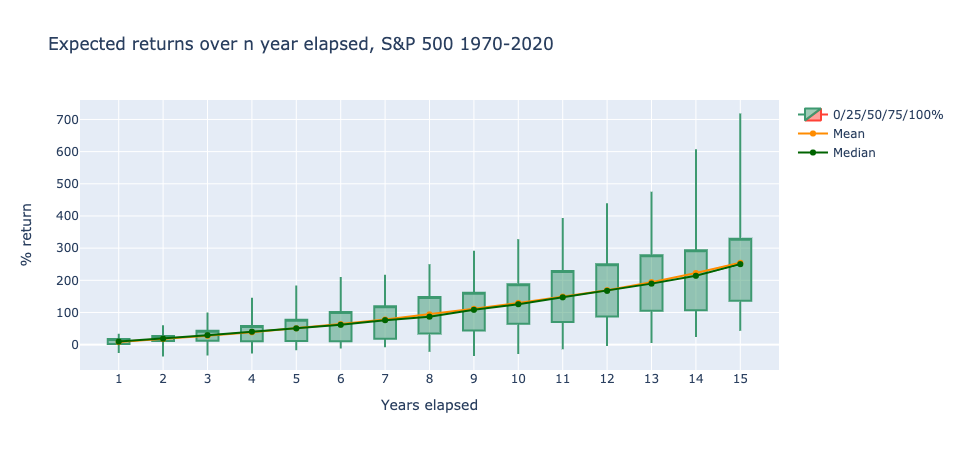

In [32]:
df = stats_by_year.iloc[0:15]
fig = go.Figure(data=[go.Candlestick(name = "0/25/50/75/100%",
                x=df['Years_elapsed'],
                open=df['25%'], high=df['max'],
                low=df['min'], close=df['75%']),
                     go.Scatter(name = "Mean", x=df["Years_elapsed"], y=df["mean"], line=dict(color='darkorange', width=2)),
                     go.Scatter(name = "Median", x=df["Years_elapsed"], y=df["50%"], line=dict(color='darkgreen', width=2))],
                layout = {"title": {"text":
                                    "Expected returns over n year elapsed, S&P 500 1970-2020"}})

#go.Scatter(x=df["Years_elapsed"], y=df["50%"], line=dict(color='orange', width=1))
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(title_text='Years elapsed', dtick = 1)
fig.update_yaxes(title_text='% return', dtick = 100)
fig.show()

fig.write_image("figures/returns_SP500_15years.pdf")

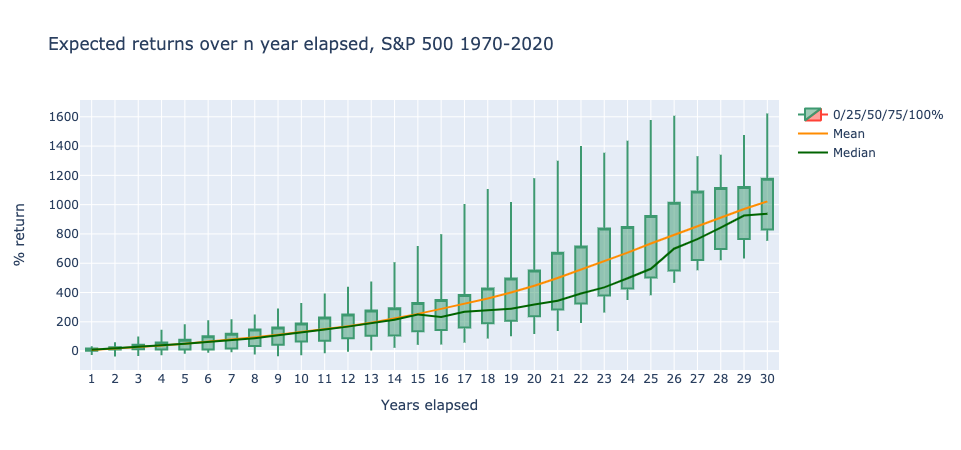

In [33]:
df = stats_by_year.iloc[0:]
fig = go.Figure(data=[go.Candlestick(name = "0/25/50/75/100%",
                x=df['Years_elapsed'],
                open=df['25%'], high=df['max'],
                low=df['min'], close=df['75%']),
                     go.Scatter(name = "Mean", x=df["Years_elapsed"], y=df["mean"], line=dict(color='darkorange', width=2)),
                     go.Scatter(name = "Median", x=df["Years_elapsed"], y=df["50%"], line=dict(color='darkgreen', width=2))],
                layout = {"title": {"text":
                                    "Expected returns over n year elapsed, S&P 500 1970-2020"}})

#go.Scatter(x=df["Years_elapsed"], y=df["50%"], line=dict(color='orange', width=1))
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(title_text='Years elapsed', dtick = 1)
fig.update_yaxes(title_text='% return', dtick = 200)
fig.show()

#fig.write_image("figures/returns_SP500_30years.png", scale = 1.5)